<h1 style="text-align:center">Projekt 1</h1>

<h1 style="text-align:center"> Analiza zbioru danych <u>School grades</u> </h1>
<h1 style="text-align:center"> Karol Degórski i Adrian Kamiński</h1>


### Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

from matplotlib import pyplot as plt
import seaborn as sns

### Wczytanie danych dotyczących szkolnych ocen

In [2]:
school_grades_df = pd.read_csv('school_grades_dataset.csv')
school_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


* Jest tylko 649 rekordów
* Są 32 różne cechy - to już całkiem sporo
* Zmienna celu to **<u>G3</u>**

| nazwa       | typ    | opis                                                                                                                                          |
|------------|---------|:-----------------------------------------------------------------------------------------------------------------------------------------------------|
| school     | string  | szkoła ucznia - wartości binarne: "GP" Gabriel Pereira, "MS" Mousinho da Silveira                                                                  |
| sex        | string  | płeć ucznia - wartości binarne: "F" żeńska, "M" męska                                                                                                     |
| age        | integer | wiek ucznia - wartości liczbowe od 15 do 22                                                                                                             |
| address    | string  | adres studenta - wartości binarne: "U" miejski, "R" wiejski                                                                                         |
| famsize    | string  | rozmiar rodziny - wartości binarne: "LE3" mniej lub równo 3, "GT3" więcej niż 3                                                                               |
| Pstatus    | string  | stan mieszkaniowy rodziców - wartości binarne: "T" mieszkają razem, "A" mieszkają osobno                                                                              |
| Medu       | integer | wykształcenie mamy ucznia - wartości liczbowe: 0 - brak,   1 - ukończona szkoła podstawowa do 4 klasy,  2 ukończona szkoła podstawowa do 9 klasy,  3 - średnie, 4 - wyższe)    |
| Fedu       | integer | wykształcenie taty ucznia - wartości liczbowe: 0 - brak,   1 - ukończona szkoła podstawowa do 4 klasy,  2 ukończona szkoła podstawowa do 9 klasy,  3 - średnie, 4 - wyższe) |
| Mjob       | string  | praca mamy ucznia - możliwe wartości: "at_home" w domu, "health" służba zdrowia, "services" usługi,  "teacher" nauczyciel,  "other" inna                                                                                                                      |
| Fjob       | string  | praca taty ucznia - możliwe wartości: "at_home" w domu, "health" służba zdrowia, "services" usługi,  "teacher" nauczyciel,  "other" inna                                                                                                                      |
| reason     | string  | powód wybrania tej szkoły - możliwe wartości: "home" blisko domu, "course" program nauki, "reputation" renoma, "other" inny                                                                                                |
| guardian   | string  | opiekun ucznia - możliwe wartości: "mother" mama, "father" tata, "other" inny                                                                                                                 |
| traveltime | integer | czas dojazdu z domu do szkoły - wartości liczbowe: 1 - do 15 minut, 2 - od 15 do 30 minut, 3 - od 30 minut do 1 godziny, 4 - ponad 1 godzinę                                         |
| studytime  | integer | tygodniowy czas nauki ucznia - wartości liczbowe: 1 - mniej niż 2 godziny, 2 - od 2 do 5 godzin, 3 - od 5 do 10 godzin, 4 - więcej niż 10 godzin                                                     |
| failures   | integer | liczba wcześniej niezdanych przedmiotów - wartości liczbowe: 0, 1, 2, 3, lub 4 jeśli liczba ta jest większa równa 4)                                                                                        |
| schoolsup  | string  | informacja czy uczeń ma dodatkowe wsparcie w zakresie nauki - wartrtości binarne: tak, nie                                                                                                        |
| famsup     | string  | informacja czy uczeń ma wsparcie w rodzinie w zakresie nauki - wartrtości binarne: tak, nie                                                                                                       |
| paid       | string  | informacja czy uczeń chodzi na płatne zajęcia dodatkowe z zakresu szkolnych przedmiotów - wartrtości binarne: tak, nie                                                                |
| activities | string  | informacja czy uczeń chodzi na zajęcia pozaszkolne - wartrtości binarne: tak, nie                                                                                                      |
| nursery    | string  | informacja czy uczeń uczęszczał do przedszkol - wartrtości binarne: tak, nie                                                                                                          |
| higher     | string  | informacja czy uczeń chce podjąć studia - wartrtości binarne: tak, nie                                                                                                   |
| internet   | string  | informacja czy uczeń ma dostęp do internetu w domu - wartrtości binarne: tak, nie                                                                                                          |
| romantic   | string  | informacja czy uczeń jest w związku - wartrtości binarne: tak, nie                                                                                                     |
| famrel     | integer | jakość relacji rodzinnych - wartości liczbowe: od 1 - bardzo złe do 5 - świetne)                                                                        |
| freetime   | integer | czas wolny po szkole - wartości liczbowe: od 1 - bardzo mało do 5 - bardzo dużo)                                                                                 |
| goout      | integer | wyjścia ze znajomymi - wartości liczbowe: od 1 - bardzo mało do 5 - bardzo dużo)                                                                                 |
| Dalc       | integer | dzienne spożycie alkoholu - wartości liczbowe: od 1 - bardzo niskie do 5 - bardzo wysokie)                                                                            |
| Walc       | integer | weekendowe spożycie alkoholu - wartości liczbowe: od 1 - bardzo niskie do 5 - bardzo wysokie)                                                                            |
| health     | integer | weekendowe spożycie alkoholu - wartości liczbowe: od 1 - bardzo niskie do 5 - bardzo wysokie)                                                                                 |
| absences   | integer | liczba nieobecności w szkole - wartości liczbowe: od 0 do 93                                                                                                   |
| G1         | integer | ocena po pierwszym okresie - wartości liczbowe: od 0 do 20                                                                                                          |
| G2         | integer | ocena po drugim okresie - wartości liczbowe: od 0 do 20                                                                                                          |
| **G3**        | **integer** | **ocena końcowa - wartości liczbowe: od 0 do 20**                                                                                                 |

In [3]:
#Sprawdźmy jakie mogą być wartości w Mjob
print('Mjob:', school_grades_df.Mjob.unique(), sep='')
#Sprawdźmy jakie mogą być wartości w Fjob
print('Fjob:', school_grades_df.Fjob.unique(), sep='')
#Sprawdźmy jakie mogą być wartości w reason
print('reason:', school_grades_df.reason.unique(), sep='')
#Sprawdźmy jakie mogą być wartości w guardian
print('guardian:', school_grades_df.guardian.unique(), sep='')
#Sprawdźmy jakie mogą być wartości w failures
print('failures:', school_grades_df.failures.unique(), sep='')

Mjob:['at_home' 'health' 'other' 'services' 'teacher']
Fjob:['teacher' 'other' 'services' 'health' 'at_home']
reason:['course' 'other' 'home' 'reputation']
guardian:['mother' 'father' 'other']
failures:[0 3 1 2]


Widzimy, że wartości unikatowe w tych zmiennych kategorycznych pokrywają się z tym co zostało podane nam w ich opisie, więc z dużym prawdopodobieństwem możemy zaufać temu opisowi

### Przekształcenie stringów na integery

In [4]:
dict_yes_no = {'yes': 1, 'no': 0}

yes_no_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
other_binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', ]

school_grades_df_encoded = school_grades_df.copy()

school_grades_df_encoded[yes_no_cols] = school_grades_df[yes_no_cols].apply(func = lambda x: x.map(dict_yes_no), axis = 1)

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

school_grades_df_encoded[other_binary_cols] = school_grades_df[other_binary_cols].apply(
    func = lambda x: labelencoder.fit_transform(x)
)

In [5]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

columns_to_encode = ['Mjob', 'Fjob', 'reason', 'guardian']

enc = OneHotEncoder()
enc_df = pd.DataFrame(
    enc.fit_transform(school_grades_df[columns_to_encode]).toarray(),
    columns = enc.get_feature_names(input_features = columns_to_encode)
)

school_grades_df.join(enc_df).drop(columns_to_encode, axis = 1)

# w celu zachowania mniejszej ilości kolumn i lepszego zrozumienia danych w tym kroku skorzystamy z LabelEncodera a nie OHE
school_grades_df_encoded[columns_to_encode] = school_grades_df[columns_to_encode].apply(
    func = lambda x: labelencoder.fit_transform(x)
)

### Podstawowe informacje o danych

In [6]:
school_grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
(school_grades_df.isnull().sum() == 0).value_counts()

True    33
dtype: int64

* Nie ma żadnych braków danych

In [8]:
school_grades_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

* Przekształcanie stringów na integery się udało

In [9]:
school_grades_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


* Większość zmiennych to zmienne dyskretne więc cieżko zauważyć tu pewne zależności
* Widać jednak bardzo porównywalne statystyki przy zmiennych  **G1, G2, G3**

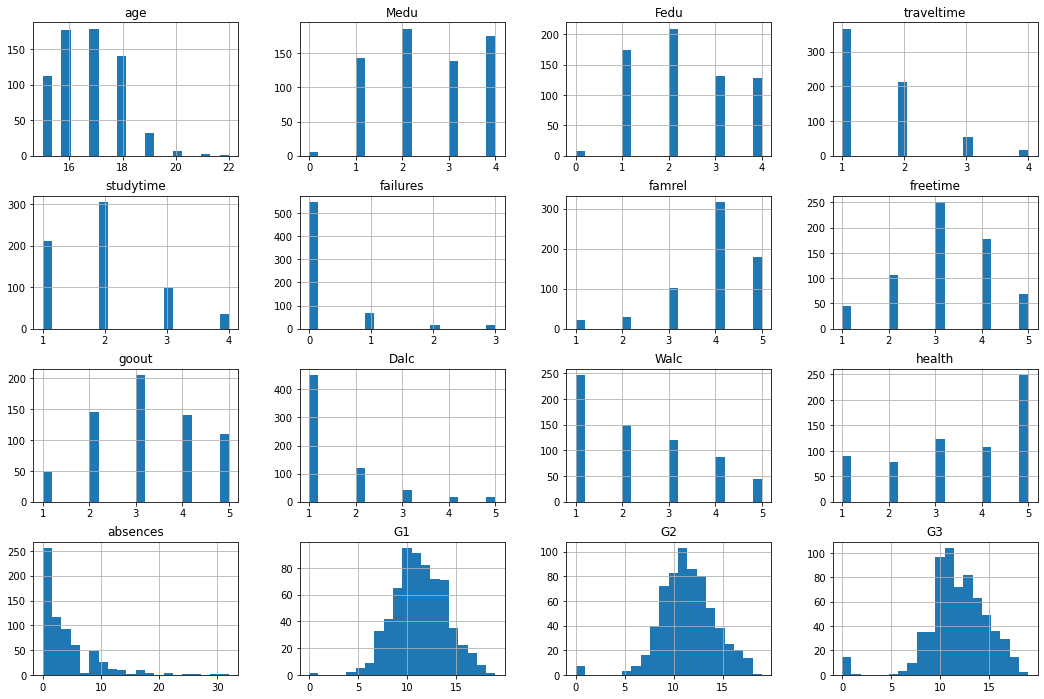

In [10]:
school_grades_df.hist(bins = 20, figsize=(18, 12))

plt.show()

* G1, G2 i zmienna celu G3 mają rozkład normalny i niemalże identyczny
* absences ma rozkład prawostronnie skośny
* Duża liczba wartości bliskich 0 przy zmiennej absences, może warto transformować logarytmicznie tą zmienną

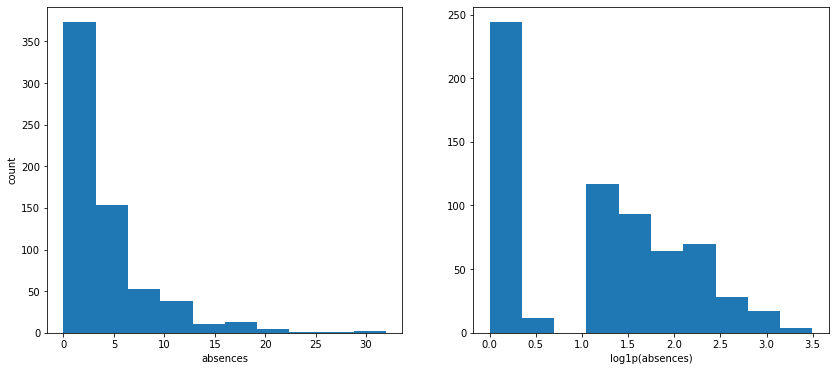

absences=0:


False    405
True     244
Name: absences, dtype: int64

In [11]:
fig, axs = plt.subplots(1,2, figsize = (14, 6))
axs[0].hist(school_grades_df_encoded.absences)
axs[1].hist(np.log1p(school_grades_df_encoded.absences))

axs[0].set_xlabel('absences')
axs[1].set_xlabel("log1p(absences)")
axs[0].set_ylabel("count")

plt.show()

print('absences=0:')
(school_grades_df_encoded.absences == 0).value_counts()

Niewielka poprawa ze względu na to, że około 38% to 0

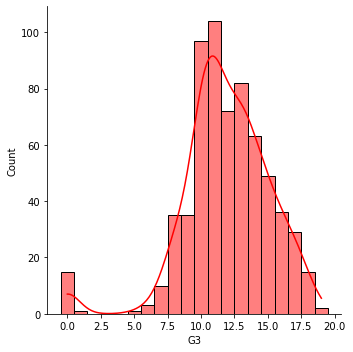

In [12]:
# Zobaczmy rozkład zmiennej celu - G3
b = sns.displot(data=school_grades_df, x='G3', color = "red", kde = True, discrete=True) 

Jak już wcześniej zauważyliśmy ma ona rozkład normalny. Widać jednak wyraźny spadek między wartością 9, a 10. Biorąc pod uwagę fakt, że 10 punktów stanowi 50% można stwierdzić, że wynika to z chęci nauczycieli do podciągnia oceny, tak aby więcej uczniów osiągnęło co najmniej połowę.

Jest trochę wartości 0. Jako, że w ramce danych nie ma wartości None, być może w taki sposób zostały zastąpione.

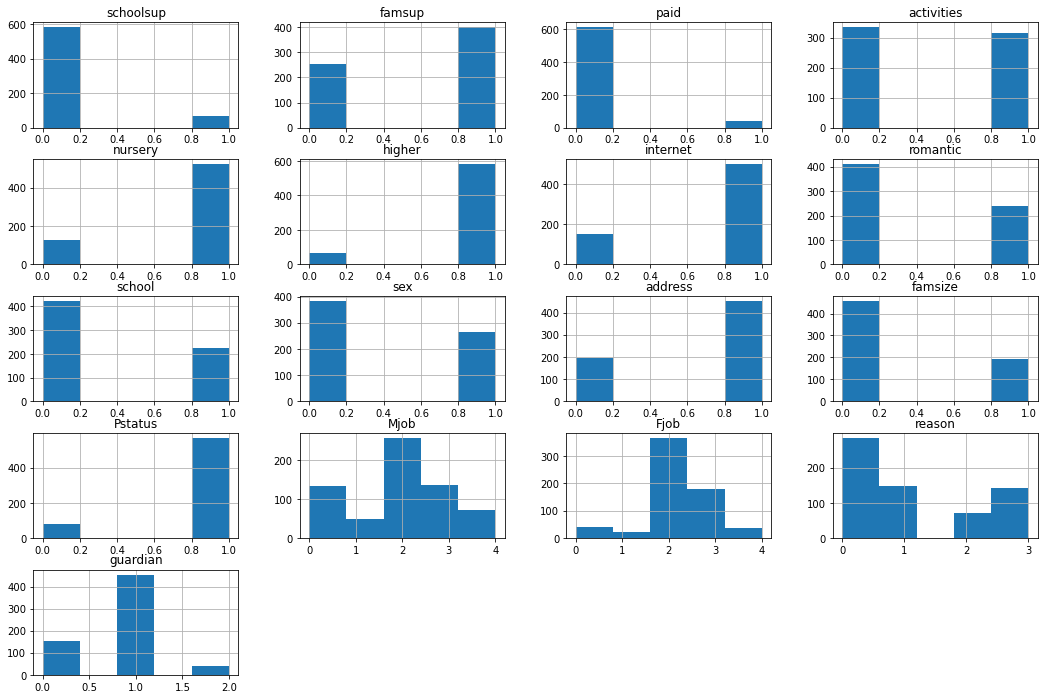

In [13]:
school_grades_df_encoded[yes_no_cols + other_binary_cols + columns_to_encode].hist(bins = 5, figsize=(18, 12))

plt.show()

- Każda zmienna dyskretna może pomóc przy modelowaniu, nie ma zmiennych które przyjmują tylko jedną wartość

### Wykresy korelacyjne

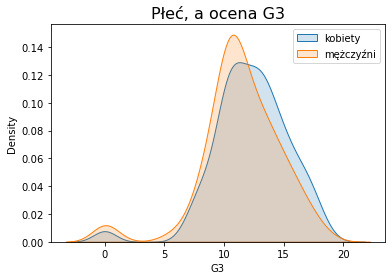

In [14]:
sns.kdeplot(data = school_grades_df.loc[school_grades_df.sex == 'F'], x = "G3", fill=True, alpha=0.2, label = "kobiety")
sns.kdeplot(data = school_grades_df.loc[school_grades_df.sex == 'M'], x = "G3", fill=True, alpha=0.2, label = "mężczyźni")
plt.title('Płeć, a ocena G3', fontsize = 16)
plt.legend()
plt.show()

Kobiety mają więcej lepszych ocen G3 niż mężczyźni

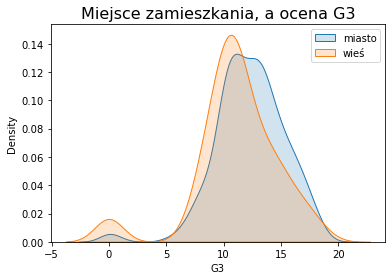

In [15]:
sns.kdeplot(data = school_grades_df.loc[school_grades_df.address == 'U'], x = "G3", fill=True, alpha=0.2, label = "miasto")
sns.kdeplot(data = school_grades_df.loc[school_grades_df.address == 'R'], x = "G3", fill=True, alpha=0.2, label = "wieś")
plt.title('Miejsce zamieszkania, a ocena G3', fontsize = 16)
plt.legend()
plt.show()

Uczniowie mieszkający w miastach mają wyższą ocene G3

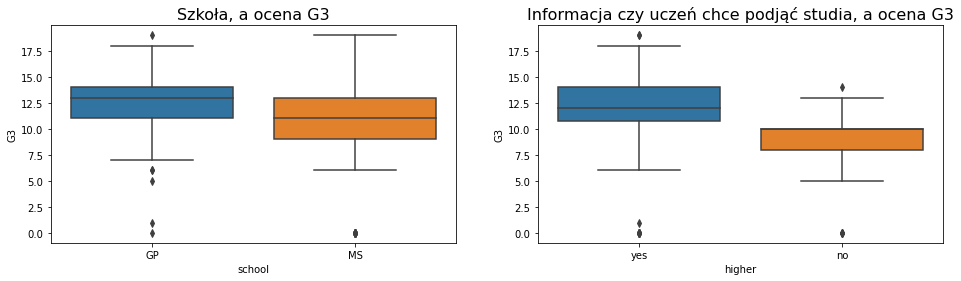

In [16]:
fig, axs = plt.subplots(1,2, figsize = (16,4))

sns.boxplot(data = school_grades_df, y="G3", x="school", ax= axs[0])

sns.boxplot(data = school_grades_df, y="G3", x="higher", ax= axs[1])

axs[0].set_title('Szkoła, a ocena G3', fontsize = 16)

axs[1].set_title("Informacja czy uczeń chce podjąć studia, a ocena G3", fontsize = 16)

plt.show()

- Uczniowie ze szkoły Gabriela Pereira mają trochę lepsze oceny
- Uczniowie, którzy zamierzają podjąć studia mają przeważnie lepsze oceny

### Macierz korelacji

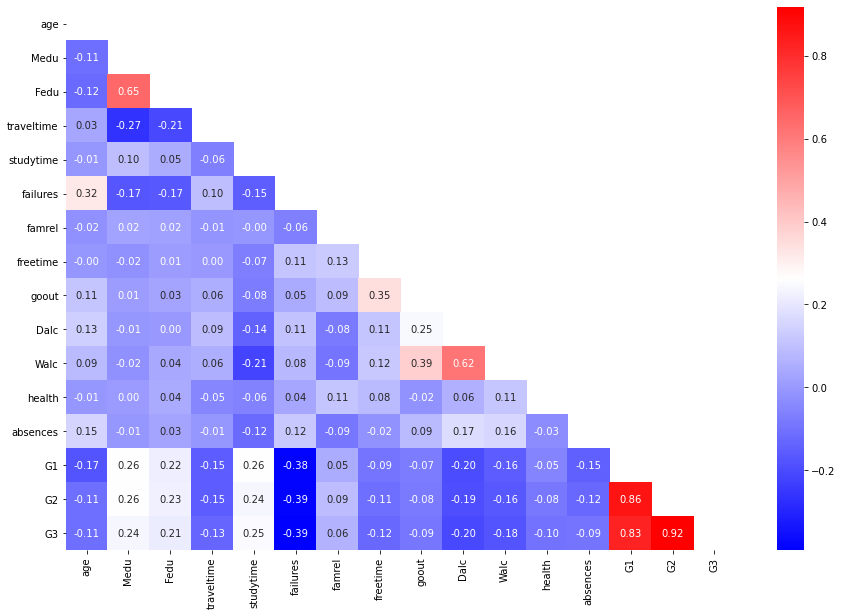

In [17]:
# Narysujemy macierz korelacji
school_grades_corr = school_grades_df.corr()
mask = np.triu(np.ones_like(school_grades_corr, dtype=bool))

plt.subplots(figsize=(15,10))
sns.heatmap(school_grades_corr, mask = mask, cmap = 'bwr', annot=True, fmt='.2f')
plt.show()

Znaczące korelacje z macierzy korelacji:
* Fedu jest dodatnio skorelowany z Medu
* failures jest dodatnio skorelowany z age
* goout jest dodatnio skorelowany z freetime
* Walc jest dodatnio skorelowany z goout i z Dalc
* G2 jest dodatnio skorelowany z G1
* zmienna celu G3 jest dodatnio skorelowana z G1 i z G2

* Failures jest ujemnie skorelowany z G1, G2 i zmienną celu G3


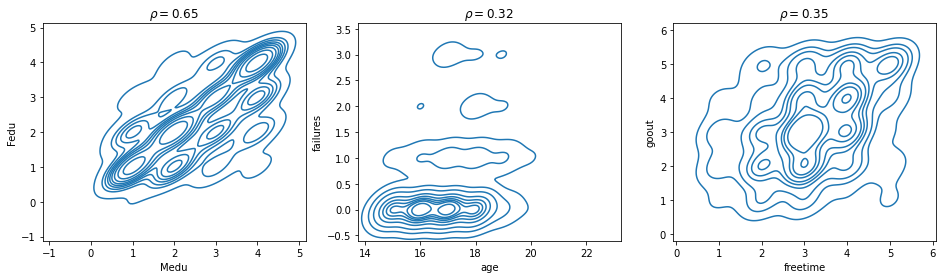

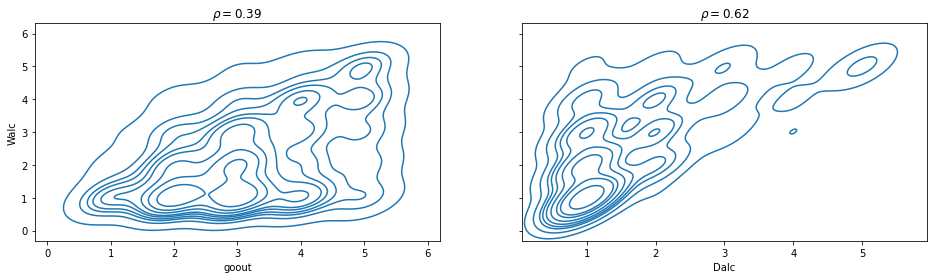

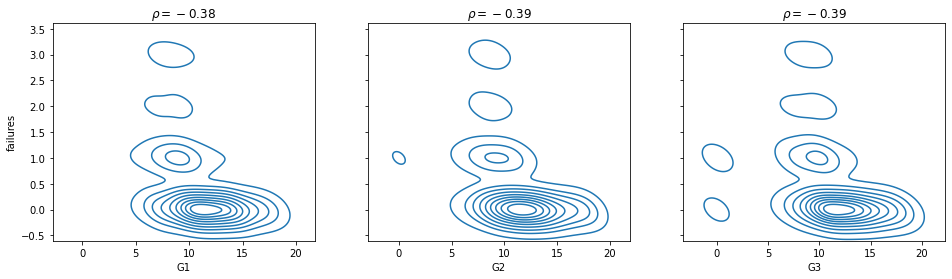

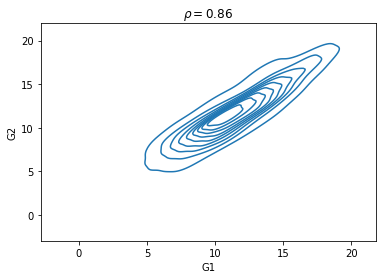

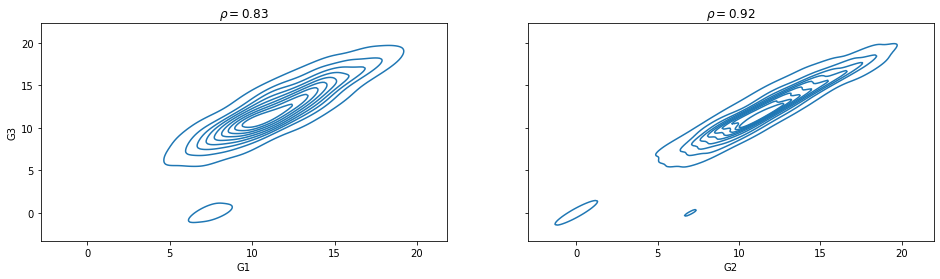

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (16,4))
sns.kdeplot(data = school_grades_df, y="Fedu", x="Medu", ax = axs[0])
axs[0].set_title(r'$\rho=0.65$')
sns.kdeplot(data = school_grades_df, y="failures", x="age", ax = axs[1])
axs[1].set_title(r'$\rho=0.32$')
sns.kdeplot(data = school_grades_df, y="goout", x="freetime", ax = axs[2])
axs[2].set_title(r'$\rho=0.35$')

plt.show()

fig, axs = plt.subplots(1, 2, figsize = (16,4), sharey = True)
sns.kdeplot(data = school_grades_df, y="Walc", x="goout", ax = axs[0])
axs[0].set_title(r'$\rho=0.39$')
sns.kdeplot(data = school_grades_df, y="Walc", x="Dalc", ax = axs[1])
axs[1].set_title(r'$\rho=0.62$')


plt.show()

fig, axs = plt.subplots(1, 3, figsize = (16,4), sharey = True)

sns.kdeplot(data = school_grades_df, y="failures", x="G1", ax = axs[0])
axs[0].set_title(r'$\rho=-0.38$')
sns.kdeplot(data = school_grades_df, y="failures", x="G2", ax = axs[1])
axs[1].set_title(r'$\rho=-0.39$')
sns.kdeplot(data = school_grades_df, y="failures", x="G3", ax = axs[2])
axs[2].set_title(r'$\rho=-0.39$')

plt.show()

sns.kdeplot(data = school_grades_df, y="G2", x="G1")
plt.title(r'$\rho = 0.86$')
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (16,4), sharey = True)

sns.kdeplot(data = school_grades_df, y="G3", x="G1", ax = axs[0])
axs[0].set_title(r'$\rho=0.83$')
sns.kdeplot(data = school_grades_df, y="G3", x="G2", ax = axs[1])
axs[1].set_title(r'$\rho=0.92$')

plt.show()

Widać, że zachodzi bardzo ładna dodatnia korelacja między G1, a G2, oraz między zmienną celu G3, a G1 i G2. Nie dziwi nas to, ponieważ zazwyczaj jeśli uczeń dobrze uczy się przez pierwszy okres, to będzie również dobrze się uczył w następnych okresach i na odwrót. Dlatego też jego ocena końcowa zazwyczaj nie powinna zbytnio odbiegać od ocen po danych okresach. Zatem na etapie modelowania warto stworzyć modele zarówno uwzględniające te dwie zmienne, jak i takie, które ich nie biorą pod uwagę i zobaczyć jak będzie różniła się ostateczna predykcja tych modeli.

Stosując KDE (kernel density estimate) ploty widać pewną korelację nawet na zmiennych dyskrentych (w których występuje hierarchia). Na przykład całkiem widoczną korelację widać miedzy zmiennymi **Medu** - **Fedu**